In [0]:
################################################
######## DCGAN(MNIST(手書き数字))
################################################

In [2]:
#=====================================
# 1.インポート・宣言部
#=====================================
from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape
from keras.layers.normalization import BatchNormalization
#from keras.layers.convolutional import UpSampling2D, Convolution2D
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.layers import GlobalAveragePooling2D
import os
from keras.datasets import mnist
from keras.optimizers import Adam
import numpy as np
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Flatten, Dropout
import matplotlib.pyplot as plt

BATCH_SIZE = 32
#NUM_EPOCH = 20
NUM_EPOCH = 6
GENERATED_IMAGE_PATH = 'generated_images_mnist/' # 生成画像の保存先


Using TensorFlow backend.


In [0]:
#=====================================
# 2.Generator
#=====================================
def generator_model():
    model = Sequential()
    model.add(Dense(input_dim=100, output_dim=1024))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(128*7*7))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Reshape((7, 7, 128), input_shape=(128*7*7,)))
    model.add(UpSampling2D((2, 2)))
#    model.add(Convolution2D(64, (5,5), border_mode='same'))
    model.add(Conv2D(64, (5,5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(UpSampling2D((2, 2)))
#    model.add(Convolution2D(1, (5,5), border_mode='same'))
    model.add(Conv2D(1, (5,5), padding='same'))
    model.add(Activation('tanh'))
    return model


#=====================================
# 3.Discriminator
#=====================================
def discriminator_model():
    model = Sequential()
#     model.add(Convolution2D(64, 5, 5,
#                             subsample=(2, 2),
#                             border_mode='same',
#                             input_shape=(28, 28, 1)))
    model.add(Conv2D(64, 5,
                            strides=2,
                            padding='same',
                            input_shape=(28, 28, 1)))
    model.add(LeakyReLU(0.2))
#    model.add(Convolution2D(128, 5, 5, subsample=(2, 2)))
    model.add(Conv2D(128, 5, strides=(2, 2)))
    model.add(LeakyReLU(0.2))
#     model.add(Flatten())
#     model.add(Dense(256))
#     model.add(LeakyReLU(0.2))
    model.add(Dropout(0.5))
  
    #
    model.add(GlobalAveragePooling2D())
  
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

In [0]:
#=====================================
# 4.描画関数
#=====================================
def plotFunc(imgData, title):
    plt.figure(figsize=(8, 4))
    plt.suptitle(title, fontsize=20)
    for i in range(BATCH_SIZE):
      plt.subplot(4, 8, i + 1)
      plt.imshow(imgData[i])
      plt.gray()
      # eliminate ticks
      plt.xticks([]), plt.yticks([])


11493376/11490434 [==============================] - 2s 0us/step


W0727 07:12:40.040329 139627004209024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0727 07:12:40.076423 139627004209024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0727 07:12:40.083202 139627004209024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0727 07:12:40.122022 139627004209024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0727 07:12:40.130779 

(60000, 28, 28, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, units=1024)`
  This is separate from the ipykernel package so we can avoid doing imports until
W0727 07:12:40.406598 139627004209024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W0727 07:12:43.175340 139627004209024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Number of batches: 1875


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoch: 0, batch: 0, g_loss: 0.708852, d_loss: 0.707994
epoch: 0, batch: 1, g_loss: 0.702217, d_loss: 0.701934
epoch: 0, batch: 2, g_loss: 0.699544, d_loss: 0.702304
epoch: 0, batch: 3, g_loss: 0.696782, d_loss: 0.705200
epoch: 0, batch: 4, g_loss: 0.694729, d_loss: 0.701224
epoch: 0, batch: 5, g_loss: 0.687227, d_loss: 0.704683
epoch: 0, batch: 6, g_loss: 0.686258, d_loss: 0.703419
epoch: 0, batch: 7, g_loss: 0.682213, d_loss: 0.703336
epoch: 0, batch: 8, g_loss: 0.678690, d_loss: 0.705107


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoch: 0, batch: 9, g_loss: 0.678241, d_loss: 0.704386
epoch: 0, batch: 10, g_loss: 0.674392, d_loss: 0.706485
epoch: 0, batch: 11, g_loss: 0.672279, d_loss: 0.706885
epoch: 0, batch: 12, g_loss: 0.671006, d_loss: 0.707131
epoch: 0, batch: 13, g_loss: 0.667754, d_loss: 0.708253
epoch: 0, batch: 14, g_loss: 0.667393, d_loss: 0.705601
epoch: 0, batch: 15, g_loss: 0.664904, d_loss: 0.706625
epoch: 0, batch: 16, g_loss: 0.664185, d_loss: 0.707785
epoch: 0, batch: 17, g_loss: 0.661089, d_loss: 0.709141
epoch: 0, batch: 18, g_loss: 0.658609, d_loss: 0.708625
epoch: 0, batch: 19, g_loss: 0.660047, d_loss: 0.707270
epoch: 0, batch: 20, g_loss: 0.659532, d_loss: 0.707177
epoch: 0, batch: 21, g_loss: 0.659566, d_loss: 0.708607
epoch: 0, batch: 22, g_loss: 0.659987, d_loss: 0.706010
epoch: 0, batch: 23, g_loss: 0.660359, d_loss: 0.705625
epoch: 0, batch: 24, g_loss: 0.661679, d_loss: 0.706960
epoch: 0, batch: 25, g_loss: 0.662867, d_loss: 0.705582
epoch: 0, batch: 26, g_loss: 0.660597, d_loss: 0.

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


epoch: 4, batch: 1500, g_loss: 0.688133, d_loss: 0.691742
epoch: 4, batch: 1501, g_loss: 0.686130, d_loss: 0.692061
epoch: 4, batch: 1502, g_loss: 0.687903, d_loss: 0.693508
epoch: 4, batch: 1503, g_loss: 0.683679, d_loss: 0.692158
epoch: 4, batch: 1504, g_loss: 0.689383, d_loss: 0.692673
epoch: 4, batch: 1505, g_loss: 0.692058, d_loss: 0.693672
epoch: 4, batch: 1506, g_loss: 0.688406, d_loss: 0.692756
epoch: 4, batch: 1507, g_loss: 0.695330, d_loss: 0.692400
epoch: 4, batch: 1508, g_loss: 0.697020, d_loss: 0.693306
epoch: 4, batch: 1509, g_loss: 0.697309, d_loss: 0.693123
epoch: 4, batch: 1510, g_loss: 0.701727, d_loss: 0.691399
epoch: 4, batch: 1511, g_loss: 0.699016, d_loss: 0.694414
epoch: 4, batch: 1512, g_loss: 0.696268, d_loss: 0.693643
epoch: 4, batch: 1513, g_loss: 0.698724, d_loss: 0.691199
epoch: 4, batch: 1514, g_loss: 0.698166, d_loss: 0.692973
epoch: 4, batch: 1515, g_loss: 0.694592, d_loss: 0.694621
epoch: 4, batch: 1516, g_loss: 0.695929, d_loss: 0.691477
epoch: 4, batc

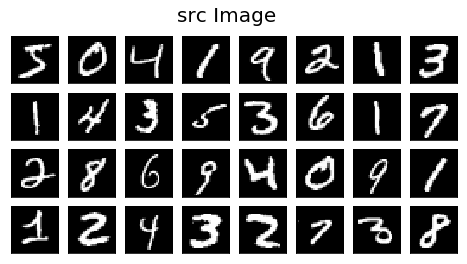

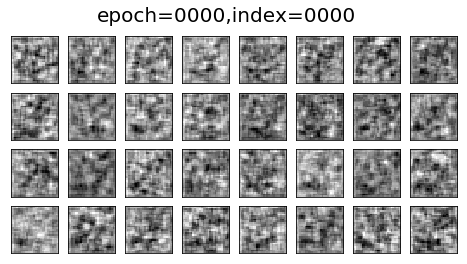

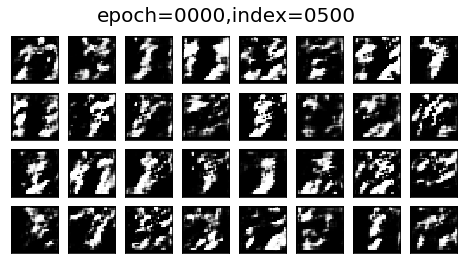

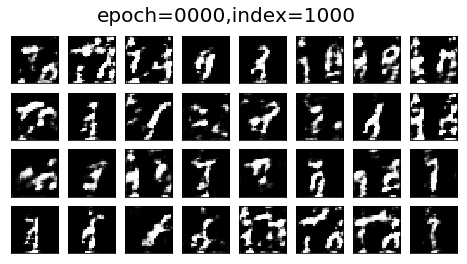

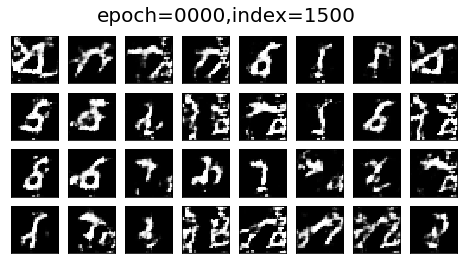

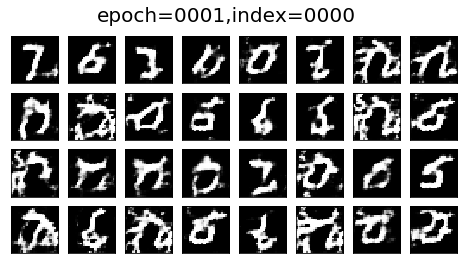

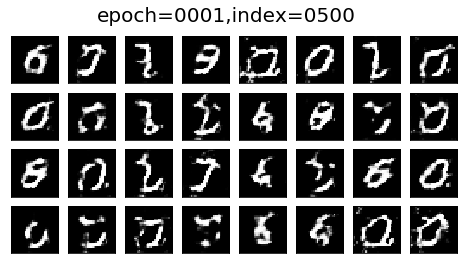

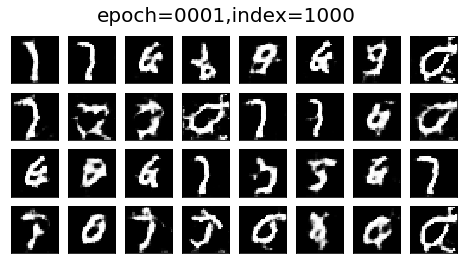

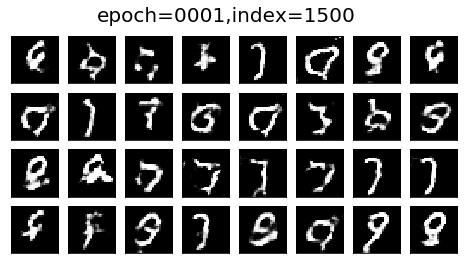

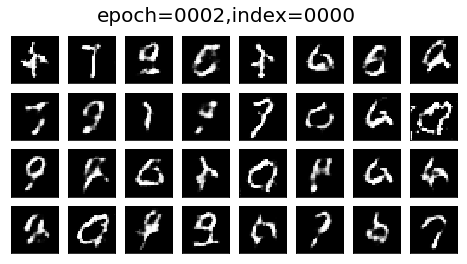

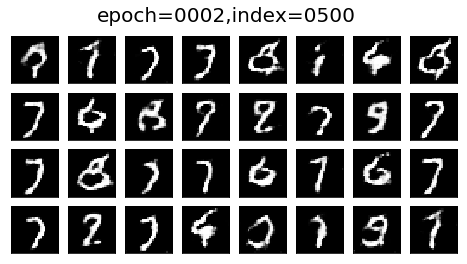

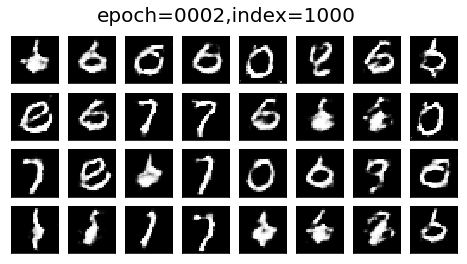

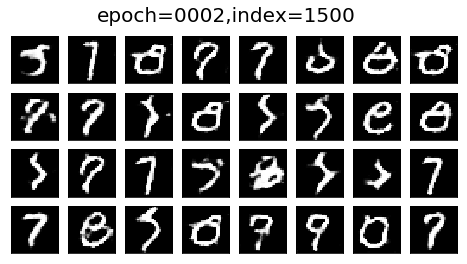

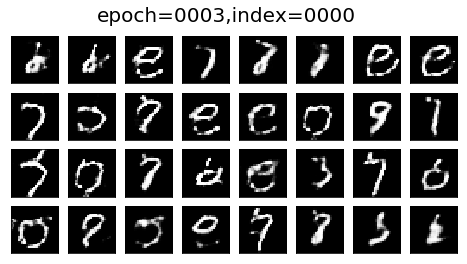

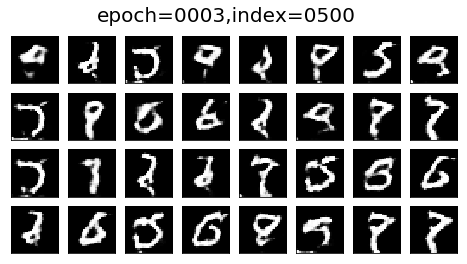

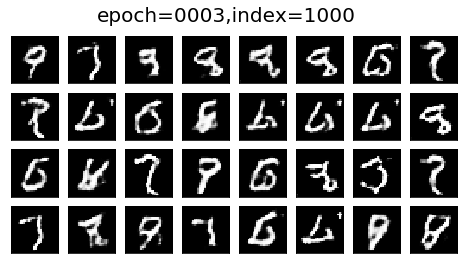

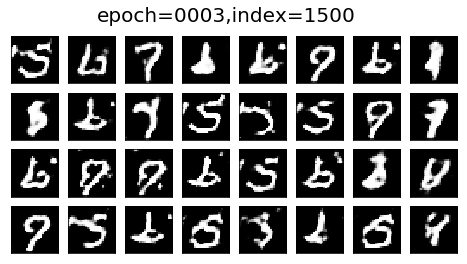

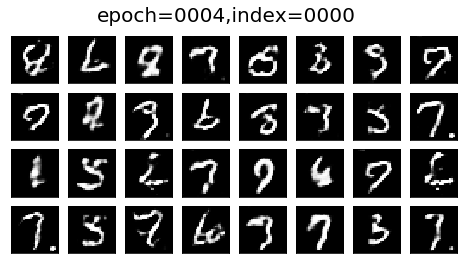

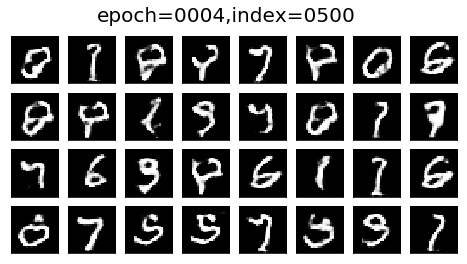

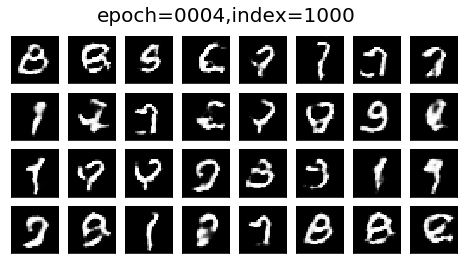

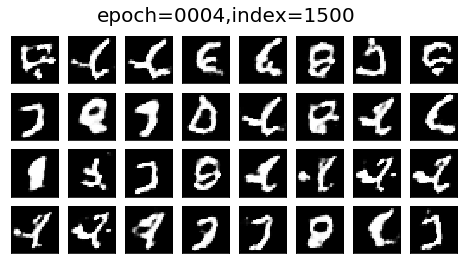

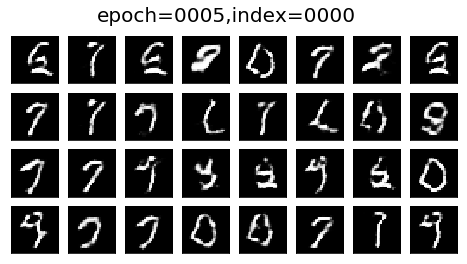

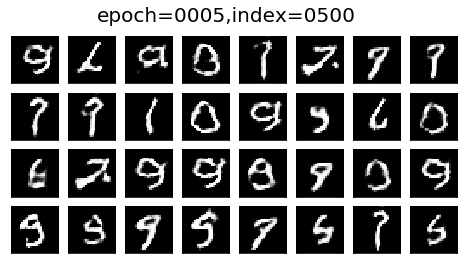

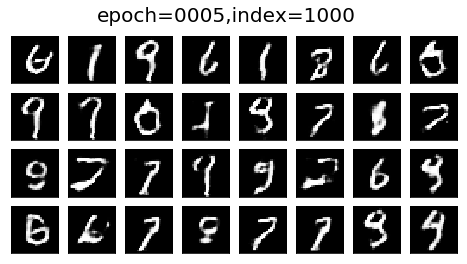

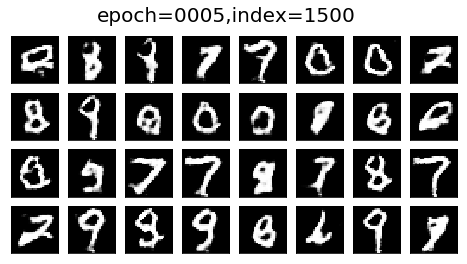

In [5]:
#=====================================
# 5.学習と実行
#=====================================
def train_test():
    # +++++++++++++++++++++++++++++++++
    # MNIST(手書き数字)をダウンロード
    # +++++++++++++++++++++++++++++++++
    (X_train, y_train), (_, _) = mnist.load_data()
    # ダウンロードした画像を試しに描画
    plotFunc(X_train, 'src Image')

    ##
    
    X_train = (X_train.astype(np.float32) - 127.5)/127.5
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
    print(X_train.shape)

    discriminator = discriminator_model()
    d_opt = Adam(lr=1e-5, beta_1=0.1)
    discriminator.compile(loss='binary_crossentropy', optimizer=d_opt)

    # generator+discriminator （discriminator部分の重みは固定）
    discriminator.trainable = False
    generator = generator_model()
    dcgan = Sequential([generator, discriminator])
    g_opt = Adam(lr=2e-4, beta_1=0.5)
    dcgan.compile(loss='binary_crossentropy', optimizer=g_opt)

    num_batches = int(X_train.shape[0] / BATCH_SIZE)
    print('Number of batches:', num_batches)
    for epoch in range(NUM_EPOCH):

        for index in range(num_batches):
            noise = np.array([np.random.uniform(-1, 1, 100) for _ in range(BATCH_SIZE)])
            image_batch = X_train[index*BATCH_SIZE:(index+1)*BATCH_SIZE]
            generated_images = generator.predict(noise, verbose=0)

            ######################
            # 生成画像を出力
            if index % 500 == 0:

                # generate images and shape
                generated_images_plot = generated_images.astype('float32') * 127.5 + 127.5
                generated_images_plot = generated_images_plot.reshape((BATCH_SIZE, 28, 28))

                # Generatorで生成された画像を描画
                plotFunc(generated_images_plot, 'epoch=%04d,index=%04d' % (epoch, index))


                # save images
                if not os.path.exists(GENERATED_IMAGE_PATH):
                    os.mkdir(GENERATED_IMAGE_PATH)
                filename = GENERATED_IMAGE_PATH + "MNIST_%04d_%04d.png" % (epoch,index)
                plt.savefig(filename)
            ######################

            # discriminatorを更新
            X = np.concatenate((image_batch, generated_images))
            y = [1]*BATCH_SIZE + [0]*BATCH_SIZE
            d_loss = discriminator.train_on_batch(X, y)

            # generatorを更新
            noise = np.array([np.random.uniform(-1, 1, 100) for _ in range(BATCH_SIZE)])
            g_loss = dcgan.train_on_batch(noise, [1]*BATCH_SIZE)
            print("epoch: %d, batch: %d, g_loss: %f, d_loss: %f" % (epoch, index, g_loss, d_loss))

        generator.save_weights('generator_fashion_mnist.h5')
        discriminator.save_weights('discriminator_fashion_mnist.h5')

#### 学習と実行
train_test()

In [6]:
!ls generated_images_mnist

MNIST_0000_0000.png  MNIST_0002_0000.png  MNIST_0004_0000.png
MNIST_0000_0500.png  MNIST_0002_0500.png  MNIST_0004_0500.png
MNIST_0000_1000.png  MNIST_0002_1000.png  MNIST_0004_1000.png
MNIST_0000_1500.png  MNIST_0002_1500.png  MNIST_0004_1500.png
MNIST_0001_0000.png  MNIST_0003_0000.png  MNIST_0005_0000.png
MNIST_0001_0500.png  MNIST_0003_0500.png  MNIST_0005_0500.png
MNIST_0001_1000.png  MNIST_0003_1000.png  MNIST_0005_1000.png
MNIST_0001_1500.png  MNIST_0003_1500.png  MNIST_0005_1500.png
